## **Classification Algorithms 1**

### **LOGISTIC REGRESSION**

**Sigmoid function** used instead of eqn of line 
h = 1 / (1-e^(-z)) ,  z = sum( mixi )


will use **sklearn** 

**Penalty / Regularization** : say we have y = m1x1 + m2x2 and x2  >> x1 so may overpower, thus,  consider it as y = m1x1 + m2x2 – Lambda*m2x2
Or y = m1x1 + m2x2(1-lambda)
.... if a parameter has very high value then penalize it by lambda
 
**C** : inverse of regularization

**Solver** = algorithm implementing for log 
reg like newton-cg, sag, ibfgs (default)

**Multi-class** or single class


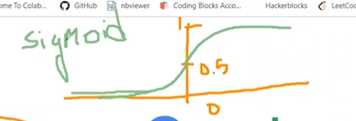

https://www.kaggle.com/hesh97/titanicdataset-traincsv

In [ ]:
! pip install -q kaggle

from google.colab import files

files.upload()  #upload the kaggle json downloaded from your account generate token

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pushpit19jain","key":"b7c5f470a3b48f2bdcf9577295307ba6"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d hesh97/titanicdataset-traincsv

  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 34.5MB/s]


In [ ]:
!unzip /content/titanicdataset-traincsv.zip

Archive:  /content/titanicdataset-traincsv.zip
  inflating: train.csv               


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
xtrain = pd.read_csv("/content/train.csv")

In [ ]:
xtrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
xtrain.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
l1 = ['PassengerId', 'Name' , 'Ticket']
xtrain.drop(l1, axis=1, inplace=True)

In [ ]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [ ]:
l2 = ['Cabin']
xtrain.drop(l2, axis=1, inplace=True)

In [ ]:
# handling none nan
xtrain.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
xtrain['Age'].fillna(xtrain['Age'].mean(), inplace=True)
emb_fill = list(xtrain['Embarked'].mode())[0]
xtrain['Embarked'].fillna( emb_fill, inplace=True)  #"S"
xtrain.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
xtrain.shape

(891, 8)

In [ ]:
# Label encoding embarked and sex
from sklearn.preprocessing import LabelEncoder
le_g = LabelEncoder()
le_emb = LabelEncoder()


In [ ]:
xtrain["Sex"] = le_g.fit_transform(xtrain["Sex"])
xtrain["Embarked"] = le_emb.fit_transform(xtrain["Embarked"])

In [ ]:
xtrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
X = xtrain.iloc[:, 1:].values
# Y = xtrain.iloc[:, 0:1].values #1d array ((891,1)))
Y = xtrain.iloc[:, 0].values #vector (891,))

In [ ]:
X.shape, Y.shape

((891, 7), (891,))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X[:5]

array([[ 0.82737724,  0.73769513, -0.5924806 ,  0.43279337, -0.47367361,
        -0.50244517,  0.58595414],
       [-1.56610693, -1.35557354,  0.63878901,  0.43279337, -0.47367361,
         0.78684529, -1.9423032 ],
       [ 0.82737724, -1.35557354, -0.2846632 , -0.4745452 , -0.47367361,
        -0.48885426,  0.58595414],
       [-1.56610693, -1.35557354,  0.40792596,  0.43279337, -0.47367361,
         0.42073024,  0.58595414],
       [ 0.82737724,  0.73769513,  0.40792596, -0.4745452 , -0.47367361,
        -0.48633742,  0.58595414]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
regmodel = LogisticRegression(solver='newton-cg', n_jobs=-1)
# using penalty = l2 as is

In [ ]:
regmodel.fit(X,Y)
# if warning comes divide y as a vector

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = regmodel.predict(X)

In [ ]:
regmodel.score(X,Y)

0.8002244668911336

In [ ]:
# trying another solver
reg2 = LogisticRegression(n_jobs=-1)
reg2.fit(X,Y)
reg2.score(X,Y)
# Mehh same value

0.8002244668911336

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_pred, Y))

# 473  102 
# 76   240
# accuracy = (473 + 240) / n

[[474 103]
 [ 75 239]]





---






---





---





---



### **SUPPORT VECTOR MACHINES**

Log Reg has some problem in sigmoid function like at the intersection of region if a point comes, then which class to assign it as

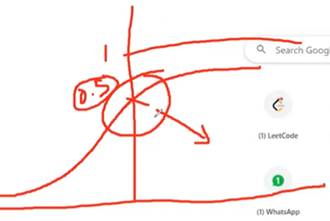

Svm also has 2 support vectors equidistance from the red line of Logreg. 

These help to differentiate between the classes and also that red line is doing it right.

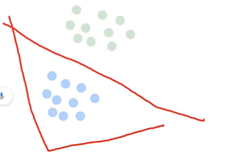 
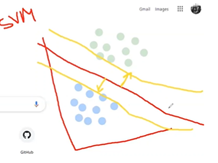

**Parameter :**

**C** : regularization parameter. For low value of this it will simply draw classification line, even wrongly predicting, and high value may not draw straight line but will predict max high. 

So will keep it high 1000 or 100

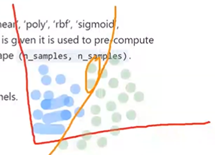
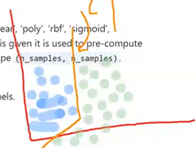

**Kernel** : no linear boundary to differentiate, so kernel changes all the points to another dimension to make a linear difference. Creates a diff plane.

Eg: rbf (gaussean kernel powerful) , poly (polynomial), sigmoid (log reg), linear(LinReg) kernels


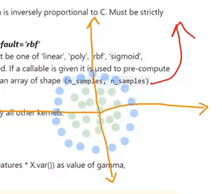 
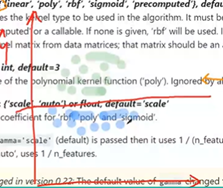

**Gamma** : will keep it low.  Kernel coeff for rbf poly and sigmoid. 

If high gamma then will only consider points nearby to the line.

For low gamma, it will consider far points also so better line


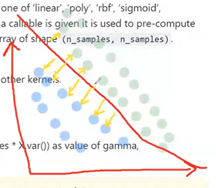

Decision_function_shape  :  ovo (one vs one), ovr (one vs rest). Say need to predict between three classes. 

Ovo creates a hyper boundry classifying all the classes

Ovr will consider one class at a time and all the other/rest classes as single class. Predicts with the help of all 3 lines.


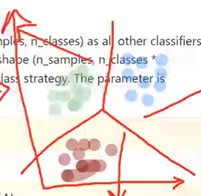

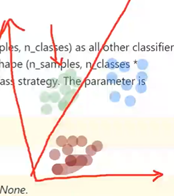
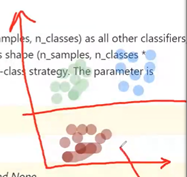

### Implementation of SVM

In [ ]:
from sklearn.svm import SVC # support vector classifier

In [ ]:
# conf matrix of Log Reg
print(confusion_matrix(y_pred, Y))

[[474 103]
 [ 75 239]]


In [ ]:
svm1 = SVC()    # C=1
svm1.fit(X,Y)
pred1 = svm1.predict(X)
print("score: ", svm1.score(X,Y))
print(confusion_matrix(pred1, Y))
# better than 0.80 of Log Reg

score:  0.8383838383838383
[[505 100]
 [ 44 242]]


In [ ]:
svm2 = SVC(C=10)
svm2.fit(X,Y)
pred2 = svm2.predict(X)
print("score: ", svm2.score(X,Y))
print(confusion_matrix(pred2, Y))

score:  0.8597081930415263
[[526 102]
 [ 23 240]]


In [ ]:
svm3 = SVC(C=10, gamma=0.1, decision_function_shape='ovo')
svm3.fit(X,Y)
pred3 = svm3.predict(X)
print("score: ", svm3.score(X,Y))
print(confusion_matrix(pred3, Y))
# less than prev so ovr > ovo

score:  0.8451178451178452
[[524 113]
 [ 25 229]]


In [ ]:
svm4 = SVC(C=10, gamma=0.1)
svm4.fit(X,Y)
pred4 = svm4.predict(X)
print("score: ", svm4.score(X,Y))
print(confusion_matrix(pred4, Y))

score:  0.8451178451178452
[[524 113]
 [ 25 229]]


In [ ]:
svm5 = SVC(C=100, gamma=1)
svm5.fit(X,Y)
pred5 = svm5.predict(X)
print("score: ", svm5.score(X,Y))
print(confusion_matrix(pred5, Y))

score:  0.9135802469135802
[[517  45]
 [ 32 297]]


In [ ]:
svm6 = SVC(gamma=0.1)
svm6.fit(X,Y)
pred6 = svm6.predict(X)
print("score: ", svm6.score(X,Y))
print(confusion_matrix(pred6, Y))

score:  0.8361391694725028
[[498  95]
 [ 51 247]]


In [ ]:
svm7 = SVC(gamma=10)
svm7.fit(X,Y)
pred7 = svm7.predict(X)
print("score: ", svm7.score(X,Y))
print(confusion_matrix(pred7, Y))

score:  0.9090909090909091
[[524  56]
 [ 25 286]]


In [ ]:
svm7 = SVC(gamma=10000, C=1000)
svm7.fit(X,Y)
pred7 = svm7.predict(X)
print("score: ", svm7.score(X,Y))
print(confusion_matrix(pred7, Y))

score:  0.978675645342312
[[547  17]
 [  2 325]]


In [ ]:
## saving outcomes
pred5_file = pd.DataFrame(pred5)
pred5_file.to_csv('Titanic_Predictions')